In [41]:
import pandas as pd 
import geopandas as gpd
import os 
import json 
parent_dir = os.path.dirname(os.getcwd())

In [42]:
relativ_centroids = r'auxilary\centroids_mappedheight.csv' 
path_centroid = os.path.join(parent_dir, relativ_centroids)
relativ_shape = r'CEA_model\2030_Baseline\inputs\building-geometry\zone.shp'
path_shape = os.path.join(parent_dir, relativ_shape)

In [43]:
# put the path to your dt project here 
path_dt_project = r'C:\Users\felix\Programmieren\UBEM_deckgl'

In [44]:
gdf_shape = gpd.read_file(path_shape)

<Axes: >

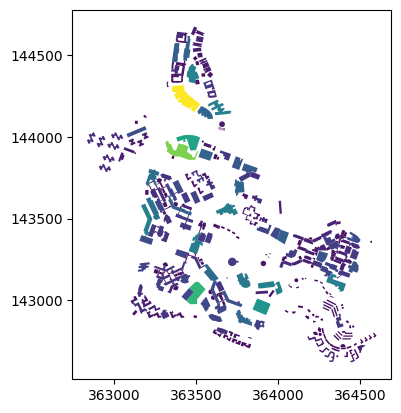

In [45]:
gdf_shape.plot(gdf_shape['geometry'].area)

In [46]:
gdf_centroid = gpd.read_file(path_centroid)
gdf_centroid

,X,Y,Z,Name,REFERENCE,category,floors_ag,floors_bg,height_ag,height_bg,gh_height,geometry
0,103.7722882,1.296042136,66.5386,B1000,NUS - OED,yes,7,0,21,3,66.5386,None
1,103.7764344,1.299056708,24.86442,B1001,OSM - as it is,yes,3,0,9,3,24.86442,None
2,103.7725091,1.297544886,63.92968,B1002,OSM - as it is,yes,5,0,15,3,63.92968,None
3,103.7730649,1.29654873,64.01325,B1003,OSM - as it is,yes,7,0,21,3,64.01325,None
4,103.7748168,1.298462603,50.69537,B1004,OSM - as it is,yes,4,0,12,3,50.69537,None
...,...,...,...,...,...,...,...,...,...,...,...,...
357,103.7697235,1.292778,13.9,B1358,OSM - median values of all buildings,yes,1,1,3,3,13.9,None
358,103.7702948,1.302559625,97.1,B1359,OSM - as it is,apartments,26,1,78,3,97.1,None
359,103.7695684,1.302218325,99.8,B1360,OSM - as it is,apartments,26,1,78,3,99.8,None
360,103.7827018,1.29670825,17.7,B1361,OSM - median values of all buildings,yes,1,1,3,3,17.7,None


In [47]:
buildings = ["B1081", "B1082", "B1083", "B1295"]

In [48]:
gdf_buildings = gdf_centroid[gdf_centroid["Name"].isin(buildings)]

In [49]:
export_dict = {
    "type": "FeatureCollection",
    "name": "UBEM_data_location",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
    "features": []
}

## Features that are relevant 
{
"Description": "SDE 1", 
"ID": "B1081", 
"Model": "City Energy Analyst - Base", 
"Reference": "Reference" 
"Type": "{Building Type from OSM}" }, 
"geometry": { "type": "Point", 
"coordinates": [ 103.771237, 1.300773, 32.732471466064453 ] }
 

In [50]:
gdf_buildings

,X,Y,Z,Name,REFERENCE,category,floors_ag,floors_bg,height_ag,height_bg,gh_height,geometry
81,103.7711353,1.2972741,42.56016,B1081,OSM - as it is,yes,5,1,15,3,42.56016,None
82,103.7706756,1.297321352,49.38908,B1082,OSM - as it is,yes,6,1,18,3,49.38908,None
83,103.7704361,1.297951467,47.11625,B1083,OSM - as it is,yes,5,1,15,3,47.11625,None
295,103.7703538,1.296804004,47.43769,B1295,OSM - as it is,university,7,1,21,3,47.43769,None


In [51]:


def create_dict_from_csv(row):

    return {
         "type": "Feature",
           "properties": {
        "Description": "Comparions of the default simulation for 2030 and a model with a reduced outdoor temperature of 1°c.", 
        "ID": row["Name"],
        "text": row["Name"],
        "Model": "City Energy Analyst - Base", 
        "Reference": row["REFERENCE"],
        "Type": row["category"]
         },
        "geometry": { "type": "Point", 
                     "coordinates": [ float(row["X"]), float(row["Y"]), float(row["Z"]) ] }
    }



# Apply the function to each row in the DataFrame to create the list of dictionaries

export_dict["features"] = gdf_buildings.apply(create_dict_from_csv, axis=1).tolist()
export_dict



{'type': 'FeatureCollection',
 'name': 'UBEM_data_location',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'Description': 'Comparions of the default simulation for 2030 and a model with a reduced outdoor comparions of 1°c.',
    'ID': 'B1081',
    'text': 'B1081',
    'Model': 'City Energy Analyst - Base',
    'Reference': 'OSM - as it is',
    'Type': 'yes'},
   'geometry': {'type': 'Point',
    'coordinates': [103.7711353, 1.2972741, 42.56016]}},
  {'type': 'Feature',
   'properties': {'Description': 'Comparions of the default simulation for 2030 and a model with a reduced outdoor comparions of 1°c.',
    'ID': 'B1082',
    'text': 'B1082',
    'Model': 'City Energy Analyst - Base',
    'Reference': 'OSM - as it is',
    'Type': 'yes'},
   'geometry': {'type': 'Point',
    'coordinates': [103.7706756, 1.297321352, 49.38908]}},
  {'type': 'Feature',
   'properties': {'Description': 'Comparions o

In [52]:
dt_path = os.path.join(path_dt_project, 'assets/UBEM_data_location.json')
with open(dt_path, "w") as f:
    json.dump(export_dict, f, indent=2)

In [53]:
import json

with open(r'C:\Users\felix\Programmieren\UBEM_deckgl\assets\UBEM_data_location.json') as f:
    d = json.load(f)
    print(d)

{'type': 'FeatureCollection', 'name': 'UBEM_data_location', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'Description': 'Comparions of the default simulation for 2030 and a model with a reduced outdoor comparions of 1°c.', 'ID': 'B1081', 'text': 'B1081', 'Model': 'City Energy Analyst - Base', 'Reference': 'OSM - as it is', 'Type': 'yes'}, 'geometry': {'type': 'Point', 'coordinates': [103.7711353, 1.2972741, 42.56016]}}, {'type': 'Feature', 'properties': {'Description': 'Comparions of the default simulation for 2030 and a model with a reduced outdoor comparions of 1°c.', 'ID': 'B1082', 'text': 'B1082', 'Model': 'City Energy Analyst - Base', 'Reference': 'OSM - as it is', 'Type': 'yes'}, 'geometry': {'type': 'Point', 'coordinates': [103.7706756, 1.297321352, 49.38908]}}, {'type': 'Feature', 'properties': {'Description': 'Comparions of the default simulation for 2030 and a model with a reduced outdoor com